# Homework 7a: Drunkard's Walk
Physics 177, Spring 2018  
**Due:** Thursday, May 17

*Van Quiambao*

## Discussion

This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi. 

The drunkard's walk is an example of a **stochastic** system---that's just a fancy way of saying that randomness plays a key role. A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. In the long homework we will relate this problem to diffusion in a physical system. 

**Note**: Random (drunk) walks are the simplest example of a **Markov chain**. In this problem, however, we will not be using it as a Markov chain---we're assigning some physical meaning to the initial condition and examining the walk as an actual time evolution. You should compare it to the *marble game* in class: when we used a marble to sample the large space of the field (and to count which samples were inside the circle). In the marble game, the order of the samples didn't matter---they were all just pieces of a statistical average. 

## Problem 1: Drunk walking in one dimension

## 1a. Filling out the positions

Fill in the code below for a *drunkard's walk* with a number of steps `nSteps = 100`. The output should be an array `xs` of length `nSteps` that contains the ordered list of positions that the drunkard has visited. For example, `xs[5]` is the $x$-position of the drunkard at the fifth step. Assume the drunkard starts at zero. Plot the result.

In [8]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

nSteps = 100
x = 0
xs = []
xs_wholesteps = []

# each step: drunkard moves one unit in a random direction
for i in range(nSteps):
    # FILL THIS IN
    dx = random.uniform(-1,1)
    xs.append(dx)
    
for i in range(nSteps):
    # FILL THIS IN
    dx_whole = random.randint(-1,1)
    xs_wholesteps.append(dx_whole)
    

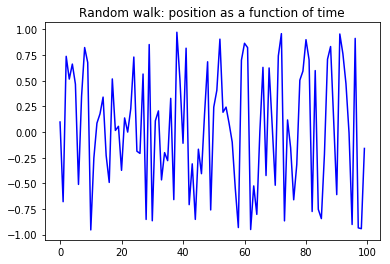

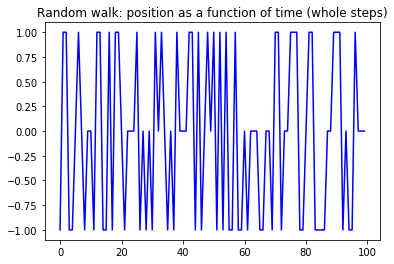

In [9]:
plt.title("Random walk: position as a function of time")
plt.plot(np.arange(nSteps), xs, 'b-')
plt.show()

plt.title("Random walk: position as a function of time (whole steps)")
plt.plot(np.arange(nSteps), xs_wholesteps, 'b-')
plt.show()

## 1b. The squared position

The drunkard moves forward and backward. Very clearly the average position is $\langle x \rangle = 0$, even though the drunkard can sometimes go very far from zero. A good measure of how far the drunkard is from the origin is the square of the position. Plot $x^2$ as a function of step.

**Cute trick**: you can write `for xi in xs:` as a for loop.

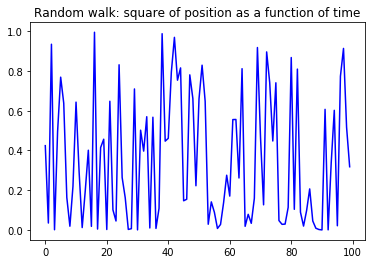

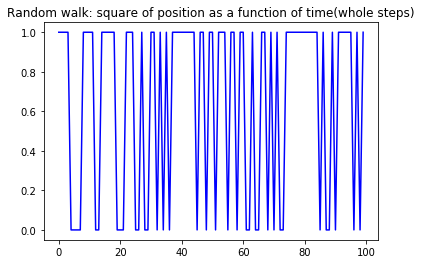

In [11]:
x2s = []
x2s_wholesteps = []

for xi in xs:
    # FILL THIS IN
    dx2 = (random.uniform(-1,1))**2
    x2s.append(dx2)
    
for xi in xs_wholesteps:
    # FILL THIS IN
    dx2_whole = (random.randint(-1,1))**2
    x2s_wholesteps.append(dx2_whole)
    
plt.title("Random walk: square of position as a function of time")
plt.plot(np.arange(nSteps), x2s, 'b-')
plt.show()

plt.title("Random walk: square of position as a function of time(whole steps)")
plt.plot(np.arange(nSteps), x2s_wholesteps, 'b-')
plt.show()

## 1c. Random Walk Is Random

If you run Problem 1a and 1b a few times, you'll notice that you can get some very different looking plots. In this step, consider not one, but `nDrunk = 1000` drunkards. These are non-interacting drunkards (very unrealistic, I know) so that they move independently of one another. In other words, you can think of them an an ensemble of individual drunk walkers. 

As you can expect, $\langle x \rangle = 0$. However, things become more interesting if you examine $\langle x^2(t) \rangle$.  

There are many ways to do this. You could use a 2D numpy array, you could loop through and keep a running tally of $x^2$ as you go through each step for each drunkard, etc. I leave it to you to code up an algorithm that you're happy with. The training wheels are off!

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

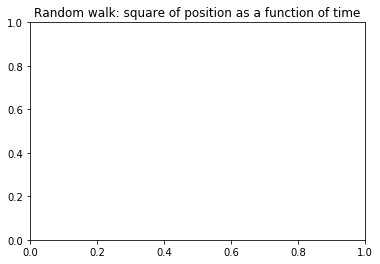

In [20]:
nDrunk = 1000
nSteps = 100

x2s_avg = []

for j in range(nDrunk):
    x2s = []
    for k in range (nSteps):
        dx2 = (random.uniform(-1,1))**2
        x2s.append(dx2)
    x2s_avg.append(x2s[-1])

# FILL THIS IN

plt.title("Random walk: square of position as a function of time")
plt.plot(np.arange(nSteps), x2s_avg, 'b-')
plt.show()

## 1d. The thinking part

Mathematically the 1D random/drunkard's walk gives:

$$\langle x^2 \rangle = 2Dt,$$

where $D$ is the **diffusion** constant. Yes, it's the same diffusion constant in Homework 6b. Based on your plots, what is the value of $D$?

For a nice derivation of the diffusion equation from the drunkard's walk (and an explanation for the factor of 2), see these slides: http://nebula.physics.uakron.edu/dept/faculty/jutta/modeling/diff_eqn.pdf

You'll also note that the precise value of $D$ is really a proportionality constant between space and time. In otherwords, it amounts to a choice of units. 

## Extra Credit: Pairs of Drunks

Consider the case of pairs of drunkards. Plot the average value of their separation, $\langle(x_A -x_B)**2\rangle$. Does this separation grow faster or slower than the separation from the origin for a single walker? In other words, after 100 steps, is a drunkard closer to the origin or closer to the other drunkard who srated at the same pub but wandered off independently?